# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Davin Ghani Ananta Kusuma
- **Email:** anantadavin4@gmail.com
- **ID Dicoding:** davin_ghani

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan registered?
- Bagaimana dampak hari kerja dan libur terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [75]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"davinghani","key":"605f21ba601be3b61417fd1bebcc714c"}'}

In [76]:
import os
import zipfile

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [77]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [79]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# check beberapa baris pertama
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- day.csv = Data penyewaan per hari
- hour.csv = Data penyewaan per jam

### Assessing Data

In [80]:
# Mengecek jumlah baris & kolom
print("Shape of day_df:", day_df.shape)
print("Shape of hour_df:", hour_df.shape)

Shape of day_df: (731, 16)
Shape of hour_df: (17379, 17)


In [81]:
# Mengecek tipe data
print("Info Dataset Harian:")
print(day_df.info())

Info Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [82]:
#Mengecek tipe data
print("Info Dataset Per Jam:")
print(hour_df.info())

Info Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [83]:
#Melihat pola data
print("Preview day_df:")
print(day_df.head())

Preview day_df:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [84]:
print("Preview hour_df:")
print(hour_df.head())

Preview hour_df:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [85]:
# Mengecek missing values di data harian
print("Missing values in day_df:")
print(day_df.isnull().sum())

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [86]:
# Mengecek missing values di data per jam
print("Missing values in hour_df:")
print(hour_df.isnull().sum())

Missing values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [87]:
# Cek jumlah duplikasi di data harian
print("Jumlah duplikasi di day_df:", day_df.duplicated().sum())

Jumlah duplikasi di day_df: 0


In [88]:
# Cek jumlah duplikasi di data per jam
print("Jumlah duplikasi di hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi di hour_df: 0


**Insight:**
- Data bersih secara struktur, tidak ada missing values & duplikasi
- Beberapa kolom sudah dikonversi ke format yang benar

### Cleaning Data

Menghapus Kolom yang Tidak Relevan

In [89]:
#* Hapus kolom yang tidak diperlukan
day_df.drop(columns=['instant', 'atemp'], inplace=True)
hour_df.drop(columns=['instant', 'atemp'], inplace=True)

In [90]:
# Cek kolom sudah terhapus
print(day_df.columns)
print(hour_df.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')
Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


Menyesuaikan Kategori pada Kolom yang Berbentuk Angka

In [91]:
# Mapping label kategori
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_mapping = {1: "Clear", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

In [92]:
# Mengubah angka menjadi kategori
day_df["season"] = day_df["season"].map(season_mapping)
hour_df["season"] = hour_df["season"].map(season_mapping)

day_df["weathersit"] = day_df["weathersit"].map(weather_mapping)
hour_df["weathersit"] = hour_df["weathersit"].map(weather_mapping)

In [93]:
# Cek perubahan
print(day_df[['season', 'weathersit']].head())
print(hour_df[['season', 'weathersit']].head())

   season weathersit
0  Spring     Cloudy
1  Spring     Cloudy
2  Spring      Clear
3  Spring      Clear
4  Spring      Clear
   season weathersit
0  Spring      Clear
1  Spring      Clear
2  Spring      Clear
3  Spring      Clear
4  Spring      Clear


Normalisasi Data

In [94]:
# Konversi kelembaban & kecepatan angin ke persen
day_df["hum"] = day_df["hum"] * 100
hour_df["hum"] = hour_df["hum"] * 100

In [95]:
# Maksimum windspeed = 67 km/h
day_df["windspeed"] = day_df["windspeed"] * 67
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [96]:
# Cek hasil konversi
print(day_df[['hum', 'windspeed']].head())
print(hour_df[['hum', 'windspeed']].head())

       hum  windspeed
0  80.5833  10.749882
1  69.6087  16.652113
2  43.7273  16.636703
3  59.0435  10.739832
4  43.6957  12.522300
    hum  windspeed
0  81.0        0.0
1  80.0        0.0
2  80.0        0.0
3  75.0        0.0
4  75.0        0.0


Cek Oulier

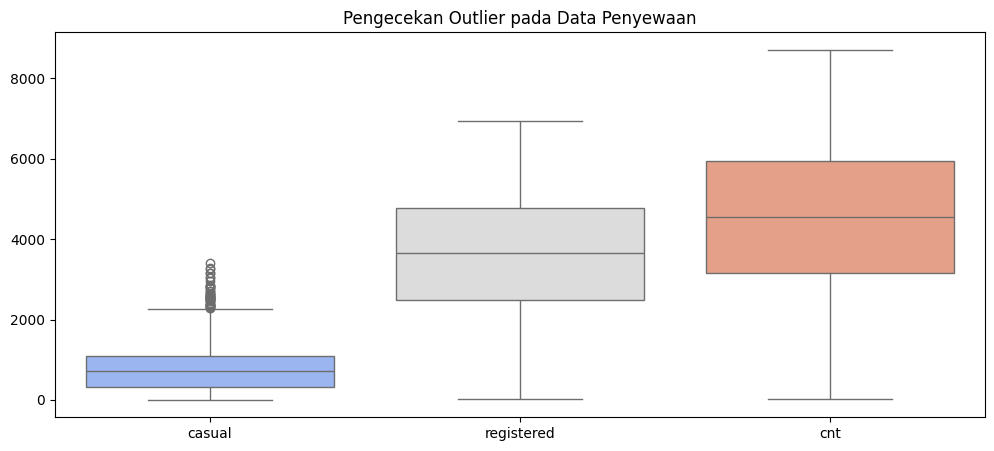

In [97]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']], palette="coolwarm")
plt.title("Pengecekan Outlier pada Data Penyewaan")
plt.show()

In [98]:
# Menghitung IQR untuk 'casual'
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan batasan outlier
print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

# Menampilkan jumlah outlier
outliers = day_df[(day_df['casual'] < lower_bound) | (day_df['casual'] > upper_bound)]
print(f"Jumlah outlier: {outliers.shape[0]}")

Batas bawah: -855.25, Batas atas: 2266.75
Jumlah outlier: 44


In [99]:
# Menghapus outlier di atas batas atas
day_df = day_df[day_df['casual'] <= upper_bound]

In [100]:
# Cek jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {day_df.shape[0]}")

Jumlah data setelah menghapus outlier: 687


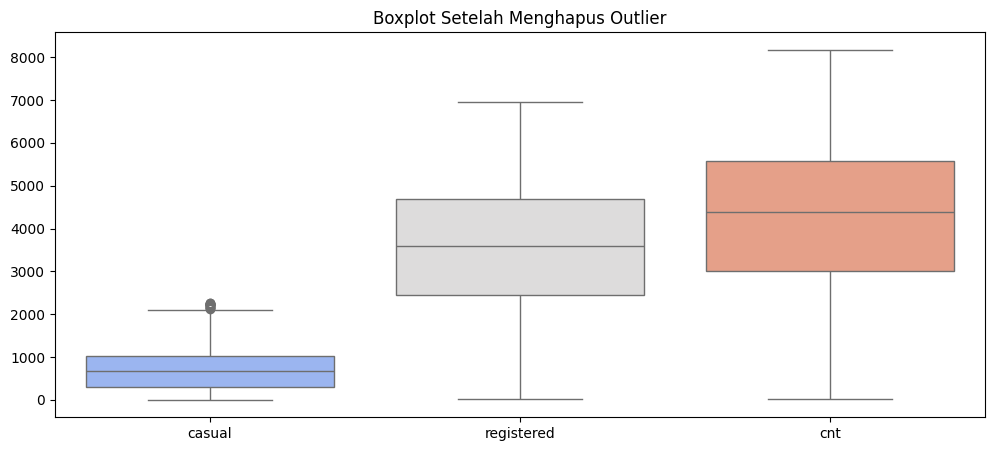

In [101]:
# Cek kembali boxplot setelah penghapusan outlier
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']], palette="coolwarm")
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

**Insight:**
- Menghapus Kolom yang Tidak Relevan
- Normalisasi Data dan Menangani Outlier

## Exploratory Data Analysis (EDA)

#### Preview dataset

In [102]:
print("Preview of day_df (Data per Day):")
print(day_df.head())

Preview of day_df (Data per Day):
       dteday  season  yr  mnth  holiday  weekday  workingday weathersit  \
0  2011-01-01  Spring   0     1        0        6           0     Cloudy   
1  2011-01-02  Spring   0     1        0        0           0     Cloudy   
2  2011-01-03  Spring   0     1        0        1           1      Clear   
3  2011-01-04  Spring   0     1        0        2           1      Clear   
4  2011-01-05  Spring   0     1        0        3           1      Clear   

       temp      hum  windspeed  casual  registered   cnt  
0  0.344167  80.5833  10.749882     331         654   985  
1  0.363478  69.6087  16.652113     131         670   801  
2  0.196364  43.7273  16.636703     120        1229  1349  
3  0.200000  59.0435  10.739832     108        1454  1562  
4  0.226957  43.6957  12.522300      82        1518  1600  


In [103]:
print("Preview of hour_df (Data per Hour):")
print(hour_df.head())

Preview of hour_df (Data per Hour):
       dteday  season  yr  mnth  hr  holiday  weekday  workingday weathersit  \
0  2011-01-01  Spring   0     1   0        0        6           0      Clear   
1  2011-01-01  Spring   0     1   1        0        6           0      Clear   
2  2011-01-01  Spring   0     1   2        0        6           0      Clear   
3  2011-01-01  Spring   0     1   3        0        6           0      Clear   
4  2011-01-01  Spring   0     1   4        0        6           0      Clear   

   temp   hum  windspeed  casual  registered  cnt  
0  0.24  81.0        0.0       3          13   16  
1  0.22  80.0        0.0       8          32   40  
2  0.22  80.0        0.0       5          27   32  
3  0.24  75.0        0.0       3          10   13  
4  0.24  75.0        0.0       0           1    1  


#### Descriptive Statistics dan Korelasi

In [104]:
print("Descriptive Statistics untuk variabel 'cnt', 'casual', 'registered', 'temp', 'hum':")
print(day_df[['cnt', 'casual', 'registered', 'temp', 'hum']].describe())

Descriptive Statistics untuk variabel 'cnt', 'casual', 'registered', 'temp', 'hum':
               cnt       casual   registered        temp         hum
count   687.000000   687.000000   687.000000  687.000000  687.000000
mean   4340.767103   732.010189  3608.756914    0.487475   62.891699
std    1866.258997   521.433756  1580.356697    0.184392   14.385371
min      22.000000     2.000000    20.000000    0.059130    0.000000
25%    3002.000000   295.000000  2452.500000    0.327917   52.000000
50%    4381.000000   674.000000  3603.000000    0.475833   62.666700
75%    5583.500000  1026.500000  4686.000000    0.650416   73.333350
max    8173.000000  2258.000000  6946.000000    0.861667   97.250000


In [105]:
print("Korelasi antar variabel:")
correlation = day_df[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']].corr()
print(correlation)

Korelasi antar variabel:
                 cnt    casual  registered      temp       hum  windspeed
cnt         1.000000  0.646002    0.967764  0.630086 -0.086684  -0.246210
casual      0.646002  1.000000    0.432923  0.598537 -0.069769  -0.201762
registered  0.967764  0.432923    1.000000  0.546590 -0.079346  -0.224182
temp        0.630086  0.598537    0.546590  1.000000  0.134474  -0.155860
hum        -0.086684 -0.069769   -0.079346  0.134474  1.000000  -0.252595
windspeed  -0.246210 -0.201762   -0.224182 -0.155860 -0.252595   1.000000


#### Agregasi Data

In [106]:
# Perbedaan pola penyewaan antara pengguna casual dan registered
agg_casual_registered = day_df[['casual', 'registered']].mean().reset_index()
agg_casual_registered.columns = ['Kategori Pengguna', 'Rata-rata Penyewaan']
print(agg_casual_registered)

  Kategori Pengguna  Rata-rata Penyewaan
0            casual           732.010189
1        registered          3608.756914


In [107]:
# Agregasi jumlah penyewaan berdasarkan hari kerja dan libur
agg_workingday = day_df.groupby('workingday')[['cnt']].mean()
print(agg_workingday)

                    cnt
workingday             
0           3713.079787
1           4577.250501


**Insight:**

- Pengguna registered memiliki jumlah penyewaan yang lebih tinggi dibandingkan casual.
- Hari kerja menunjukkan jumlah penyewaan lebih tinggi dibandingkan hari libur.

## Visualization & Explanatory Analysis

---



### Pertanyaan 1: Bagaimana Perbedaan Pola Penyewaan Sepeda antara Pengguna Casual dan Registered?

#### Bar Chart Penyewaan Casual vs. Registered

<ipython-input-108-0850e6fe816b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kategori Pengguna', y='Rata-rata Penyewaan', data=agg_casual_registered, palette='coolwarm')


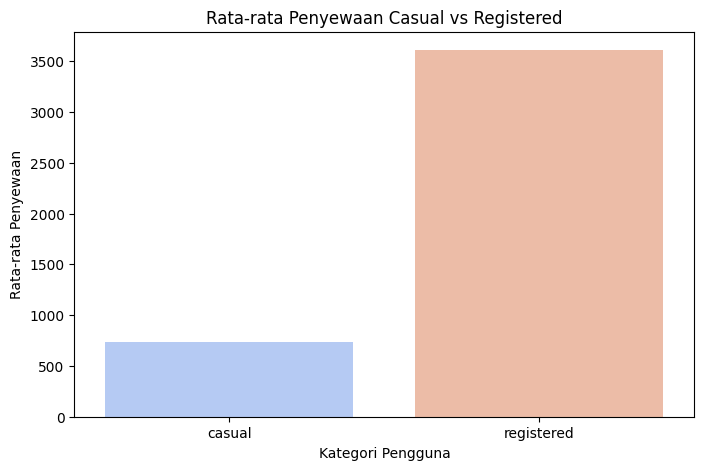

In [108]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Kategori Pengguna', y='Rata-rata Penyewaan', data=agg_casual_registered, palette='coolwarm')
plt.title("Rata-rata Penyewaan Casual vs Registered")
plt.xlabel("Kategori Pengguna")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

### Pertanyaan 2: Bagaimana Dampak Hari Kerja dan Libur Terhadap Penyewaan Sepeda?

#### Bar Chart Penyewaan Berdasarkan Hari Kerja dan Libur

<ipython-input-109-52e24f2aa157>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg_workingday.index, y=agg_workingday['cnt'], palette='coolwarm')


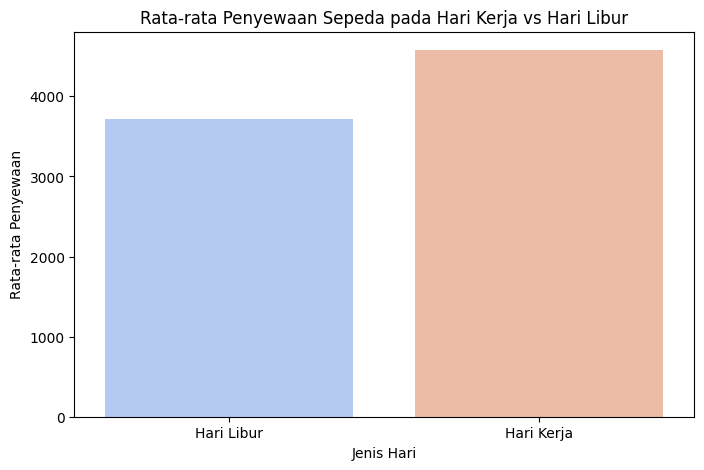

In [109]:
plt.figure(figsize=(8, 5))
sns.barplot(x=agg_workingday.index, y=agg_workingday['cnt'], palette='coolwarm')
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja vs Hari Libur")
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

#### Tren Penyewaan per Bulan untuk Hari Kerja vs. Hari Libur

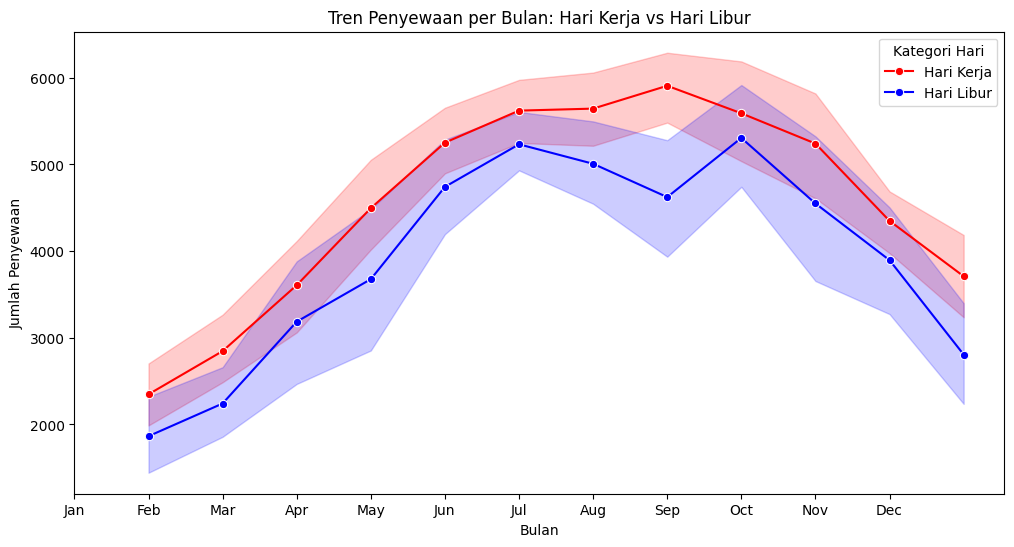

In [110]:
plt.figure(figsize=(12, 6))

# Plot untuk Hari Kerja
sns.lineplot(data=day_df[day_df['workingday'] == 1], x='mnth', y='cnt', label='Hari Kerja', color='red', marker='o')

# Plot untuk Hari Libur
sns.lineplot(data=day_df[day_df['workingday'] == 0], x='mnth', y='cnt', label='Hari Libur', color='blue', marker='o')

plt.title("Tren Penyewaan per Bulan: Hari Kerja vs Hari Libur")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Kategori Hari")
plt.show()

**Insight:**
- Pengguna registered cenderung memiliki jumlah penyewaan yang lebih stabil dan lebih tinggi dibandingkan dengan pengguna casual yang memiliki variasi lebih besar
- Hari kerja memiliki rata-rata penyewaan yang lebih tinggi dibandingkan dengan hari libur, yang menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan rutin seperti pergi bekerja
- Penyewaan sepeda lebih tinggi pada hari kerja selama bulan-bulan tertentu (misalnya musim semi dan gugur), sementara hari libur menunjukkan fluktuasi yang lebih besar

## Analisis Lanjutan (Opsional)

### Clustering dengan Metode Manual Grouping


Penyewaan berdasarkan kategori suhu

In [111]:
# Menentukan kriteria untuk pengelompokan manual berdasarkan jumlah penyewaan ('cnt')
bins = [0, 2000, 5000, 8000]  # Rentang jumlah penyewaan
labels = ['Rendah', 'Sedang', 'Tinggi']
day_df['pengelompokan'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

In [112]:
# Menampilkan Hasil
print(day_df[['cnt', 'pengelompokan']].head())

    cnt pengelompokan
0   985        Rendah
1   801        Rendah
2  1349        Rendah
3  1562        Rendah
4  1600        Rendah


#### Visualisasi

<ipython-input-113-5e36e649f4e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='pengelompokan', palette='coolwarm')


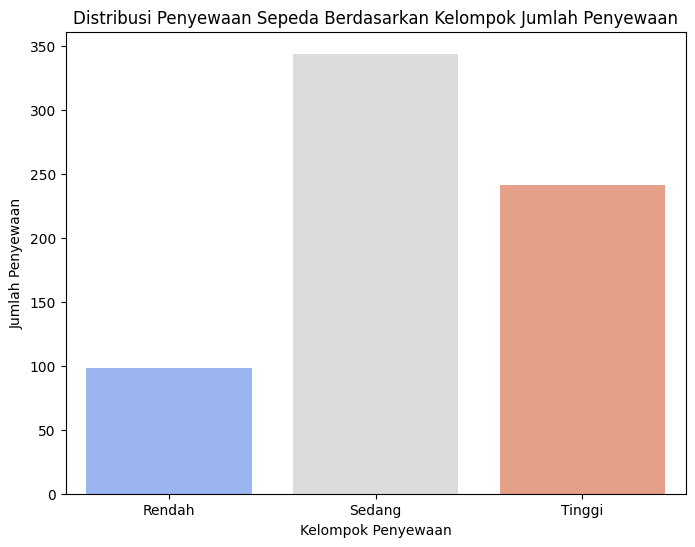

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(data=day_df, x='pengelompokan', palette='coolwarm')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kelompok Jumlah Penyewaan")
plt.xlabel("Kelompok Penyewaan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight**
- Kelompok "Tinggi" menunjukkan bahwa ada periode atau kondisi di mana penyewaan sepeda sangat tinggi.
- Kelompok "Rendah" menunjukkan periode dengan penyewaan yang lebih sedikit, mungkin karena cuaca buruk atau hari kerja.
- Kelompok "Sedang" menggambarkan kondisi normal atau rata-rata

## Conclusion

1. Perbandingan Pengguna Casual vs. Registered

- Pengguna registered memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan casual.
- Nilai rata-rata tertinggi ditemukan pada pengguna registered, yang menunjukkan bahwa mereka lebih sering menggunakan sepeda secara rutin.
- Pengguna casual lebih fluktuatif, kemungkinan besar dipengaruhi oleh faktor cuaca atau musim liburan.


2. Dampak Hari Kerja dan Hari Libur

- Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari libur.
- Penyewaan tertinggi biasanya terjadi selama musim semi dan gugur, yang kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.
- Pada hari libur, jumlah penyewaan lebih tidak menentu, menunjukkan bahwa penggunaan sepeda lebih terkait dengan aktivitas rekreasi dibandingkan transportasi rutin.

Eksport data

In [114]:
day_df.to_csv('processed_sepeda_dashboard.csv', index=False)